<a href="https://colab.research.google.com/github/raulbenitez/DAPR/blob/master/PCA_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Penguins data and remove NaNs

In [16]:
import seaborn as sns

df = sns.load_dataset("penguins")
df1 = df.drop(columns=['species','island','sex'])
df2 = df1.dropna()
df2.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Standardize data before PCA

In [4]:
from sklearn.preprocessing import StandardScaler
df3 = StandardScaler().fit_transform(df2)

In [17]:
df3.shape

(342, 4)

Apply PCA

In [6]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4).fit(df3)


Check the explained variance by each Principal Component

In [8]:
pca.explained_variance_ratio_

array([0.68843878, 0.19312919, 0.09130898, 0.02712305])

You need 3 components to explain more than the 95% of the data variance, so you can project from 4D to 3D

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.68843878, 0.88156797, 0.97287695, 1.        ])

Project to 3D in the PCA space

In [10]:
Xproj = pca.transform(df3)
Xproj.shape


(342, 4)

Keep only the three first PCA components

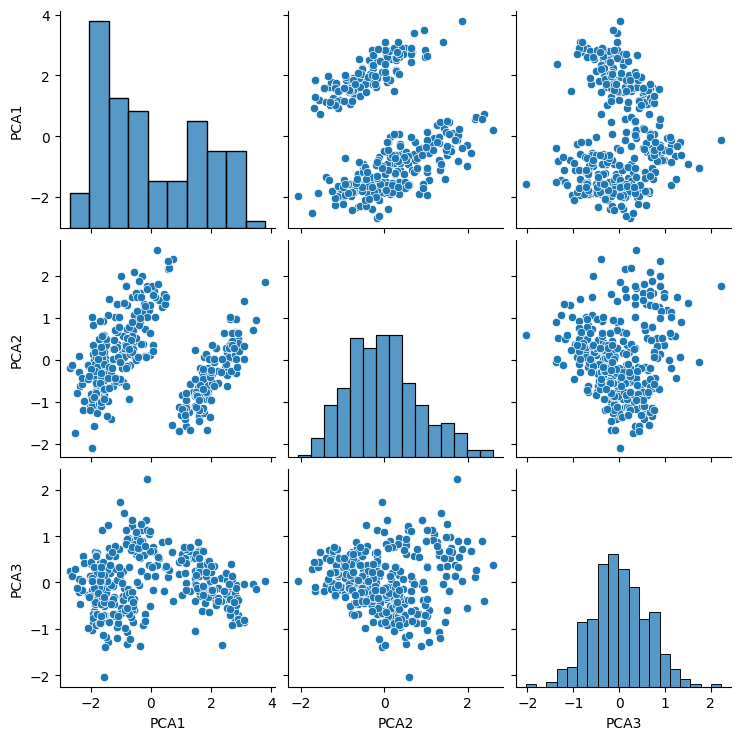

In [15]:
import pandas as pd

df4 = pd.DataFrame(Xproj[:,0:3],columns=['PCA1','PCA2','PCA3'])

sns.pairplot(df4)